In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('average_perceptron_tagger')
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Error loading average_perceptron_tagger: Package
[nltk_data]     'average_perceptron_tagger' not found in index


In [3]:
import pandas as pd

In [4]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [5]:
data=pd.read_csv('Elon_musk.csv',encoding='Latin-1',error_bad_lines=False)
data

<ipython-input-5-8051469b688d>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv('Elon_musk.csv',encoding='Latin-1',error_bad_lines=False)


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
import re
def cleaning (text):
  text=re.sub('[^a-zA-Z]',' ',str(text).lower().strip())
  text=re.sub('@[a-zA-Z0-9_]+', '',text)
  text=re.sub('#','',text)
  text=re.sub('RT[\s]+','',text)
  text=re.sub('https?:\/\/\S+','',text)
  text=re.sub('https','',text)
  text=re.sub('\n',' ',text)
  return(text)

In [9]:
data['Text']=data['Text'].apply(cleaning)

In [10]:
data

,Text
0,kunalb i m an alien
1,id aa carmack ray tracing on cyberpunk with h...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazi...
...,...
1994,flcnhvy true it sounds so surreal but the n...
1995,ppathole make sure to read ur terms amp con...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is u f ...


In [11]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
def lemm(data):
  wordnet = WordNetLemmatizer()
  lemmanized = []
  for i in range(len(data)):
    lemmed=[]
    words=word_tokenize(data['Text'].iloc[i])
    for w in words:
      lemmed.append(wordnet.lemmatize(w))
      lemmanized.append(lemmed)

  data['lemmanized']=lemmanized
  data['Text']=data['lemmanized'].apply(' '.join)
  data=data.drop('lemmanized',axis=1)
  return data

In [12]:
data

,Text
0,kunalb i m an alien
1,id aa carmack ray tracing on cyberpunk with h...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazi...
...,...
1994,flcnhvy true it sounds so surreal but the n...
1995,ppathole make sure to read ur terms amp con...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is u f ...


## **Sentiment Analysis**

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#Intilaize the sentiment analyzer
analyzer=SentimentIntensityAnalyzer()
#function to analyze sentiment and assign labels
def analyze_sentiment(text):
  sentiment_score=analyzer.polarity_scores(text)

  if sentiment_score['compound']>=0.05:
    return 'Positive'
  elif sentiment_score['compound']<=-0.05:
    return ' Negative'
  else:
    return 'Neutral'

#apply sentiment analysis to each row in DF
data['Sentiment']=data['Text'].apply(analyze_sentiment)

print(data[['Text','Sentiment']])

                                                   Text  Sentiment
0                                 kunalb   i m an alien    Neutral
1      id aa carmack ray tracing on cyberpunk with h...    Neutral
2                    joerogan  spotify great interview    Positive
3                        gtera   doge is underestimated   Negative
4      teslacn congratulations tesla china for amazi...   Positive
...                                                 ...        ...
1994   flcnhvy true  it sounds so surreal  but the n...   Negative
1995   ppathole make sure to read ur terms  amp  con...   Positive
1996                 teslagong  ppathole samwise gamgee    Neutral
1997   ppathole altho dumb and dumber is  u     f   ...   Negative
1998                          progress update august      Positive

[1999 rows x 2 columns]


<Axes: xlabel='Sentiment', ylabel='count'>

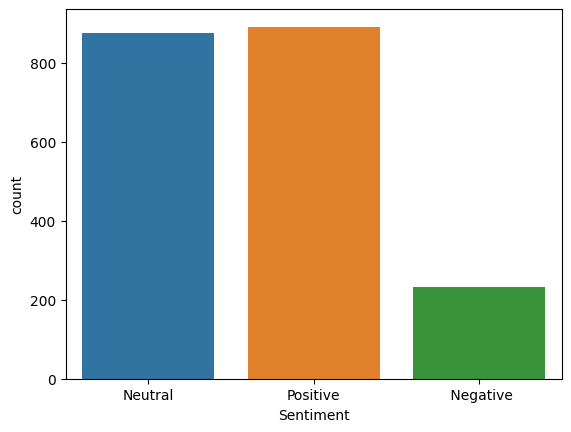

In [14]:
import seaborn as sns
sns.countplot(x='Sentiment',data=data)

In [15]:
from nltk.corpus import stopwords
removal=list(stopwords.words('english'))+list(punctuation)
stemmer=LancasterStemmer()
corpus=data['Text'].tolist()
print(len(corpus))

1999


In [16]:
final_corpus=[]
final_corpus_joined=[]
for i in data.index:
  text=re.sub('[^$a-zA-Z]',' ',data['Text'][i])
  text=text.lower()
  text=re.sub('&lt;/?.*&gt;','&lt;&gt;',text)
  text=re.sub('(\\d|\\W)+',' ',text)
  text=text.split()
  lem=WordNetLemmatizer()
  lemmatizer=[lem.lemmatize(word) for word in text if not word in removal]
  text=' '.join(text)
  final_corpus.append(text)
  final_corpus_joined.append('text')

In [17]:
data_1=pd.DataFrame()
data_1['Text']=final_corpus
data_1['Sentiment']=data['Sentiment'].values

In [18]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
data_1['Sentiment']=model.fit_transform(data_1['Sentiment'])
data_1

,Text,Sentiment
0,kunalb i m an alien,1
1,id aa carmack ray tracing on cyberpunk with hd...,1
2,joerogan spotify great interview,2
3,gtera doge is underestimated,0
4,teslacn congratulations tesla china for amazin...,2
...,...,...
1994,flcnhvy true it sounds so surreal but the nega...,0
1995,ppathole make sure to read ur terms amp condit...,2
1996,teslagong ppathole samwise gamgee,1
1997,ppathole altho dumb and dumber is u f u f,0


In [19]:
data_1

,Text,Sentiment
0,kunalb i m an alien,1
1,id aa carmack ray tracing on cyberpunk with hd...,1
2,joerogan spotify great interview,2
3,gtera doge is underestimated,0
4,teslacn congratulations tesla china for amazin...,2
...,...,...
1994,flcnhvy true it sounds so surreal but the nega...,0
1995,ppathole make sure to read ur terms amp condit...,2
1996,teslagong ppathole samwise gamgee,1
1997,ppathole altho dumb and dumber is u f u f,0


In [20]:
pos=data_1[data_1['Sentiment']==2]
pos_list=pos['Text'].tolist()
neg=data_1[data_1['Sentiment']==0]
neg_list=neg['Text'].tolist()

In [21]:
pos_all=''.join([word for sent in pos_list for word in sent])
neg_all=''.join([word for sent in neg_list for word in sent])

# Positive Words

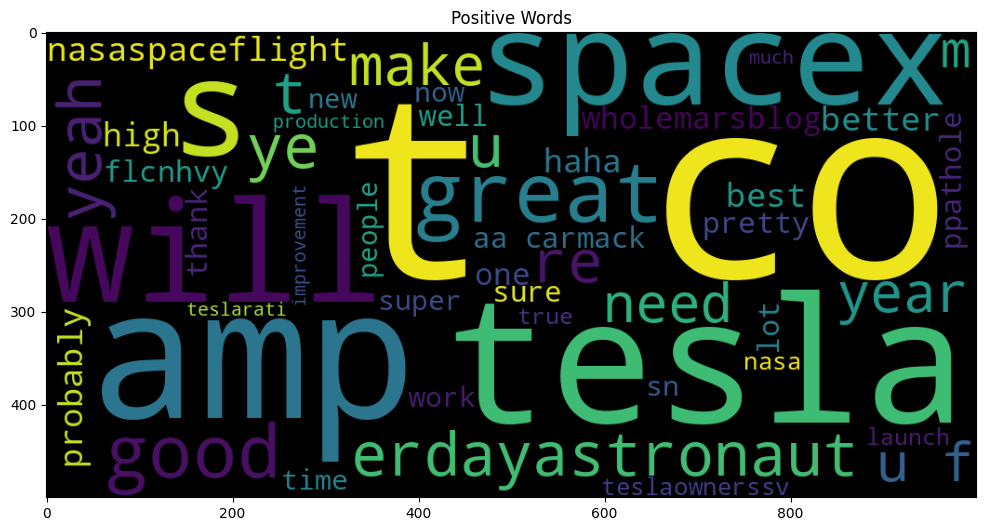

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
WordCloud()
wordcloud=WordCloud(width=1000,height=500,max_words=50,background_color='black').generate(pos_all)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.title('Positive Words')
plt.show()

## Negative Words

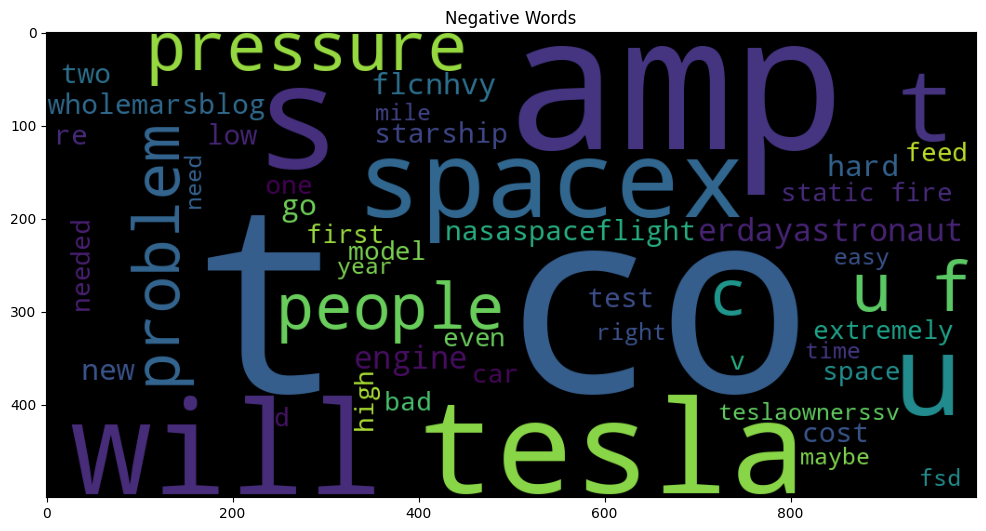

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
WordCloud()
wordcloud=WordCloud(width=1000,height=500,max_words=50,background_color='black').generate(neg_all)
plt.figure(figsize=(12,12))
plt.title('Negative Words')
plt.imshow(wordcloud)
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()

x=tfid.fit_transform(data['Text'])
y=data['Sentiment']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_train_pred=model.predict(x_train)
print(accuracy_score(y_train,y_train_pred)*100)

90.36898061288305
